### Appstore data analysis

In this notebook I will be analysing data from the appstore. This dataset was download from dataquest. This will be more of an exploratory data analysis since there isn't anything to predict or classify. </p> I will be taking a look at:</p>
<li>Which genre is the most popular</li>
<li>The price of apps</li>
<li>If there are any corralation between features</li>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [5]:
os.path.abspath(os.path.dirname('AppleStore.csv'))

'/Users/brunoozaki/Desktop/Data projects'

In [9]:
apple= pd.read_csv("/Users/brunoozaki/Desktop/Data projects/Datasets/AppleStore.csv")

In [10]:
apple

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,1170406182,Shark Boom - Challenge Friends with your Pet,245415936,USD,0.0,0,0,0.0,0.0,1.0.9,4+,Games,38,5,1,1
7193,1069830936,【謎解き】ヤミすぎ彼女からのメッセージ,16808960,USD,0.0,0,0,0.0,0.0,1.2,9+,Book,38,0,1,1
7194,1070052833,Go!Go!Cat!,91468800,USD,0.0,0,0,0.0,0.0,1.1.2,12+,Games,37,2,2,1
7195,1081295232,Suppin Detective: Expose their true visage!,83026944,USD,0.0,0,0,0.0,0.0,1.0.3,12+,Entertainment,40,0,1,1


This is the dataset we'll be working on.

In [80]:
apple.drop_duplicates(inplace=True)

In [81]:
apple['prime_genre'].value_counts()

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 <a list of 23 Text xticklabel objects>)

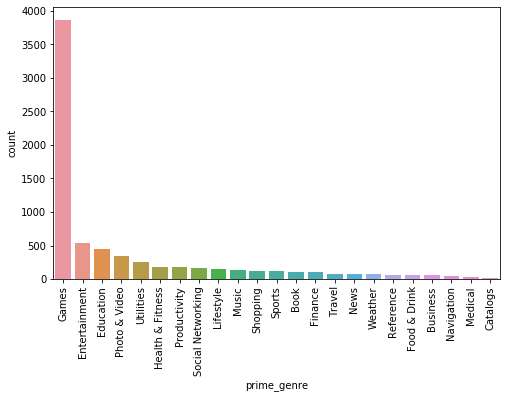

In [82]:
plt.figure(figsize=(8,5))
sns.countplot(data=apple, x='prime_genre',order=apple['prime_genre'].value_counts().index)
plt.xticks(rotation=90)

There are more games on this dataset

Let's take a look at the price of the apps

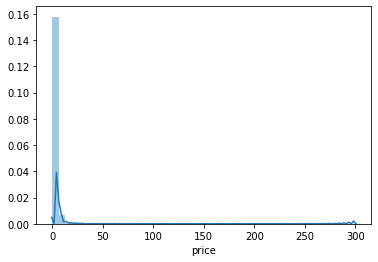

In [83]:
sns.distplot(apple.price)

Looks like most apps are free. Let's take a look at the most expensive app

In [84]:
apple['price'].max()

299.99

In [85]:
apple[apple['price']==299.99]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
5184,551215116,LAMP Words For Life,583263232,USD,299.99,41,0,4.0,0.0,1.5.5,4+,Education,24,5,1,1


Apparently, LAMP Words For Life is the most expensive app costing $299.99. About the app: "is designed to meet the communication needs of children with autism.It combines the power of PRC's Unity® language system and Language Acquisition through Motor Planning (LAMP™), a proven-therapeutic approach that uses consistent motor plans for accessing vocabulary" Pretty interesting

Since Games are the most popular apps, lets see which ones people are downloading the most

In [86]:
apple[apple['prime_genre']=='Games']

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
2,529479190,Clash of Clans,116476928,USD,0.00,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.00,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
7,553834731,Candy Crush Saga,222846976,USD,0.00,961794,2453,4.5,4.5,1.101.0,4+,Games,43,5,24,1
9,343200656,Angry Birds,175966208,USD,0.00,824451,107,4.5,3.0,7.4.0,4+,Games,38,0,10,1
10,512939461,Subway Surfers,156038144,USD,0.00,706110,97,4.5,4.0,1.72.1,9+,Games,38,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7186,1169971902,Hey Duggee: We Love Animals,136347648,USD,2.99,0,0,0.0,0.0,1.2,4+,Games,40,5,1,1
7189,1070725569,【悲報】鬼ヶ島終了のお知らせ -ゾンビ桃太郎が3Dすぎて鬼やばいwww-,147131392,USD,0.00,0,0,0.0,0.0,1.0.1,12+,Games,40,4,1,1
7191,1069796800,Brain15 − 脳トレ 無料パズル −,8912896,USD,0.00,0,0,0.0,0.0,1.2,12+,Games,38,0,1,1
7192,1170406182,Shark Boom - Challenge Friends with your Pet,245415936,USD,0.00,0,0,0.0,0.0,1.0.9,4+,Games,38,5,1,1


In [87]:
games=apple[apple['prime_genre']=='Games']

In [88]:
games['user_rating'].max()

5.0

In [89]:
games[games['user_rating']==5]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
23,487119327,Head Soccer,121319424,USD,0.00,481564,8518,5.0,5.0,5.4.1,4+,Games,40,4,11,1
28,350642635,Plants vs. Zombies,105379840,USD,0.99,426463,680,5.0,4.0,1.9.13,9+,Games,38,0,5,1
40,930574573,Sniper 3D Assassin: Shoot to Kill Gun Game,157851648,USD,0.00,386521,10332,5.0,5.0,1.17.6,17+,Games,40,5,9,1
44,698255242,Geometry Dash Lite,69076992,USD,0.00,370370,2650,5.0,4.5,2.11,4+,Games,37,4,1,1
53,387428400,Infinity Blade,624107810,USD,0.99,326482,177050,5.0,5.0,1.4.1,12+,Games,43,5,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6247,1044550538,You hate me? わたしのこと きらい？,53769216,USD,0.00,1,1,5.0,5.0,1.0.0,17+,Games,38,0,1,1
6248,1095919153,ゲームセンター倶楽部,111177728,USD,5.99,1,1,5.0,5.0,1.01,9+,Games,38,5,1,1
6252,1096695328,蜀山诛魔纪-古装恋爱仙侠动作手游·MMO端游品质,322576384,USD,0.00,1,1,5.0,5.0,1.1.2,4+,Games,40,5,1,1
6253,1058752053,大挂西游 - 降魔之路官方正版,95742976,USD,0.00,1,1,5.0,5.0,1.1.1,4+,Games,40,5,1,1


In [90]:
games.sort_values('rating_count_tot',ascending=False).head(5)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
7,553834731,Candy Crush Saga,222846976,USD,0.0,961794,2453,4.5,4.5,1.101.0,4+,Games,43,5,24,1
9,343200656,Angry Birds,175966208,USD,0.0,824451,107,4.5,3.0,7.4.0,4+,Games,38,0,10,1
10,512939461,Subway Surfers,156038144,USD,0.0,706110,97,4.5,4.0,1.72.1,9+,Games,38,5,1,1


Analysing the corralation between features

In [91]:
games.corr()

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
id,1.000000,0.004539,-0.186895,-0.255439,-0.095341,-0.223192,-0.194636,-0.077627,0.053832,-0.084509,-0.010485
size_bytes,0.004539,1.000000,0.494616,-0.008983,-0.001113,0.028217,0.038269,-0.249685,0.052302,0.035522,-0.193947
price,-0.186895,0.494616,1.000000,-0.073234,-0.023491,0.071275,0.063794,-0.211126,0.011251,-0.053512,-0.148749
rating_count_tot,-0.255439,-0.008983,-0.073234,1.000000,0.185239,0.099400,0.092645,0.010072,0.017255,0.110467,0.014884
rating_count_ver,-0.095341,-0.001113,-0.023491,0.185239,1.000000,0.069770,0.074445,0.077034,0.026148,0.010576,0.008469
user_rating,-0.223192,0.028217,0.071275,0.099400,0.069770,1.000000,0.849252,-0.052688,0.262229,0.163054,0.113267
user_rating_ver,-0.194636,0.038269,0.063794,0.092645,0.074445,0.849252,1.000000,-0.050280,0.246319,0.153187,0.090637
sup_devices.num,-0.077627,-0.249685,-0.211126,0.010072,0.077034,-0.052688,-0.050280,1.000000,-0.113624,-0.068119,-0.055608
ipadSc_urls.num,0.053832,0.052302,0.011251,0.017255,0.026148,0.262229,0.246319,-0.113624,1.000000,0.124955,0.165860
lang.num,-0.084509,0.035522,-0.053512,0.110467,0.010576,0.163054,0.153187,-0.068119,0.124955,1.000000,0.029426


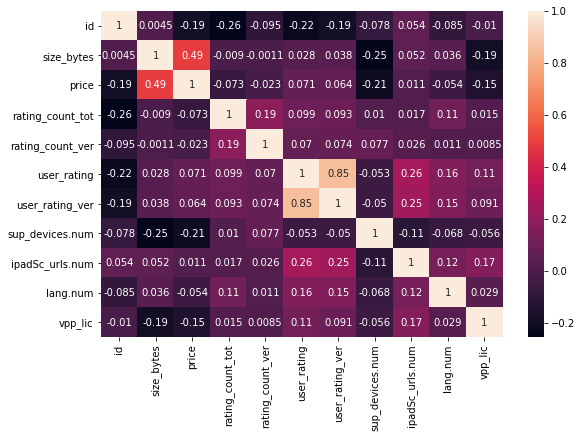

In [92]:
plt.figure(figsize=(9,6))
sns.heatmap(games.corr(),annot=True)

There only seems to be a corralation between user rating and user rating version, which makes sense since it's the same app.